In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
# File to Load (Remember to Change These)
file_to_load = "COVID19_line_list_data.csv"

# File and store into Pandas data frame
covid_data = pd.read_csv(file_to_load)
covid_data

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2.0,2/25/2020,NaN,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,...,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...,NaN,NaN,NaN,NaN,NaN,NaN
1081,1082,1.0,2/24/2020,NaN,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,...,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...,NaN,NaN,NaN,NaN,NaN,NaN
1082,1083,1.0,2/26/2020,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,...,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...,NaN,NaN,NaN,NaN,NaN,NaN
1083,1084,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,...,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
covid_data.count()

id                       1085
case_in_country           888
reporting date           1084
Unnamed: 3                  0
summary                  1080
location                 1085
country                  1085
gender                    902
age                       843
symptom_onset             563
If_onset_approximated     560
hosp_visit_date           507
exposure_start            128
exposure_end              341
visiting Wuhan           1085
from Wuhan               1081
death                    1085
recovered                1085
symptom                   270
source                   1085
link                     1085
Unnamed: 21                 0
Unnamed: 22                 0
Unnamed: 23                 0
Unnamed: 24                 0
Unnamed: 25                 0
Unnamed: 26                 0
dtype: int64

In [16]:
covid_sex = covid_data.drop(['age',
'case_in_country',
'reporting date',
'Unnamed: 3', 
'summary',
'location',
'country',
'symptom_onset',
'If_onset_approximated',
'hosp_visit_date',
'exposure_start',
'exposure_end',
'visiting Wuhan',
'from Wuhan',
'symptom','source','link','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26', 'death',
'recovered'], axis=1)
covid_sex = covid_sex.dropna(subset=['gender'])

covid_sex = covid_sex.groupby(['gender'])
sex_plot = covid_sex.count()
sex_plot


,id
gender,
female,382
male,520


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002726AEACE80>],
      dtype=object)

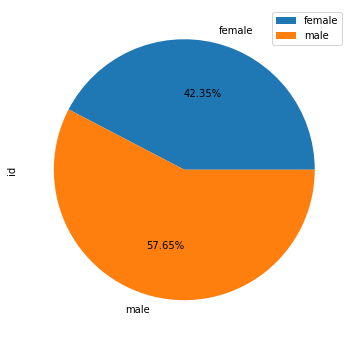

In [17]:
sex_plot.plot.pie(subplots=True,autopct="%1.2f%%", figsize=(11, 6))


In [18]:
covid_age = covid_data.drop(['gender',
'case_in_country',
'reporting date',
'Unnamed: 3', 
'summary',
'location',
'country',
'symptom_onset',
'If_onset_approximated',
'hosp_visit_date',
'exposure_start',
'exposure_end',
'visiting Wuhan',
'from Wuhan',
'symptom','source','link','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26', 'death',
'recovered'], axis=1)
covid_age = covid_age.dropna(subset=['age'])
covid_age['Age group'] = pd.cut(covid_age.age,
                            bins = [0,9,19,29,39,49,59,69,79,120], labels = ['<10', '10-19', '20-29', '30-39', '40-49','50-59', '60-69', '70-79','+80'])
covid_age = covid_age.drop(['age'], axis = 1)
covid_age = covid_age.groupby(['Age group'])
age_plot  = covid_age.count()




array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027269C62130>],
      dtype=object)

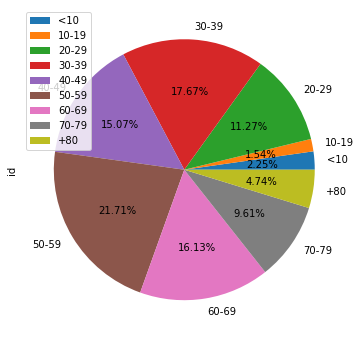

In [20]:
age_plot.plot.pie(subplots=True,autopct="%1.2f%%", figsize=(11, 6))